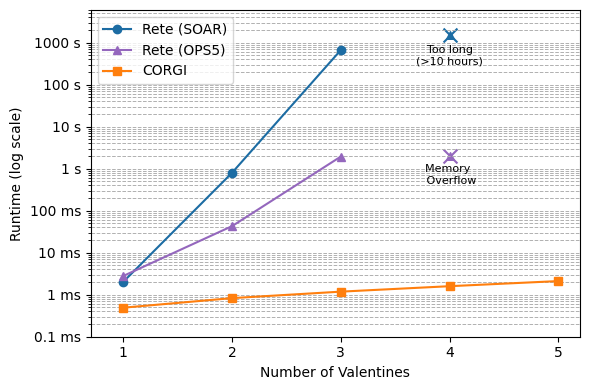

[75.76482127207755, -118.53539448249742, -124.93691890405003, -6.410728065409128]
SOAR BEST 3D
[40.49293690491567, -154.83413501855532, -159.11455026537757, -4.2002803568965295]
OPS5 BEST 3D
[-25.744024316033226, -37.71115600398879, -83.69405435697884, -22.793943626509538]
CORGI BEST 3D


/tmp/ipykernel_505866/2557007834.py:6: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, d)
/tmp/ipykernel_505866/2557007834.py:6: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, d)


In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

colors = ['#1c6ca3', '#ff7f0e', '#2fac2f', '#cb2525', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

soar_color = colors[0]
ops5_color = colors[4]
corgi_color = colors[1]


soar_rt_b_valens =  [2.026, 798.768, 665563.636, np.nan, np.nan]
ops5_rt_b_valens =  [2.795, 42.889, 1941.143, np.nan, np.nan]
corgi_rt_b_valens = [0.490967, 0.829590, 1.183105, 1.595215, 2.111572]
n_valens = np.arange(5)+1

plt.figure(figsize=(6, 4))
# Create the plot
plt.plot(n_valens, soar_rt_b_valens, label='Rete (SOAR)', color=soar_color, marker='o')
plt.plot(n_valens, ops5_rt_b_valens, label='Rete (OPS5)', color=ops5_color, marker='^')
plt.plot(n_valens, corgi_rt_b_valens, label='CORGI', color=corgi_color, marker='s')

#plt.title('Two Line Plot')
plt.xlabel('Number of Valentines')
plt.ylabel('Runtime (log scale)')
plt.ylim(.1, 6000000)
plt.xlim(.7, 5.2)
plt.yscale('log')


# Add X and text label near the point
plt.scatter(4, 1500000, color=soar_color, marker='x', s=100)
plt.scatter(4, 1500000, color=soar_color, marker='^', s=30)
plt.text(4, 500000, 'Too long\n(>10 hours)', color='black', ha='center', va='center', fontsize=8)

plt.scatter(4, 2000, color=ops5_color, marker='x', s=100)
plt.scatter(4, 2000, color=ops5_color, marker='^', s=30)
plt.text(4, 700, 'Memory \n Overflow', color='black', ha='center', va='center', fontsize=8)



tick_positions = [.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
tick_labels = ['0.1 ms', '1 ms', '10 ms', '100 ms', '1 s', '10 s', '100 s', '1000 s']
plt.yticks(tick_positions, tick_labels)

plt.gca().xaxis.set_major_locator(MultipleLocator(1))

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig(f"runtime_by_val.png", bbox_inches='tight')
plt.show()


print("SOAR BEST", best_model(x_vals, soar_valentine))
print("OPS5 BEST", best_model(x_vals, ops5_valentine))
print("CORGI BEST", best_model(x_vals, corgi_valentine))

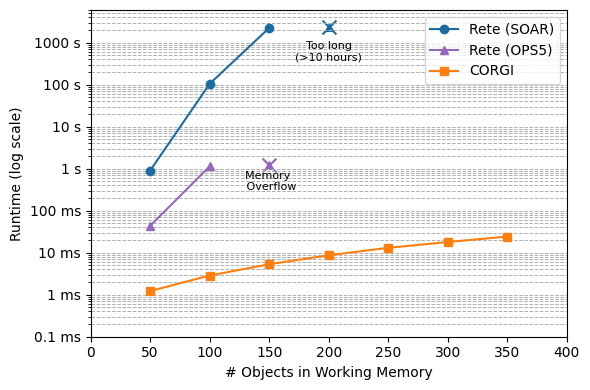

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

colors = ['#1c6ca3', '#ff7f0e', '#2fac2f', '#cb2525', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

soar_color = colors[0]
ops5_color = colors[4]
corgi_color = colors[1]


soar_rt_b_wm =  [903.797, 105057.098, 2250054.336, np.nan, np.nan, np.nan, np.nan]
ops5_rt_b_wm =  [43.826, 1139.188, np.nan, np.nan, np.nan, np.nan, np.nan]
corgi_rt_b_wm = [1.224365, 2.865234, 5.313477, 8.699219, 13.092529, 17.949463, 24.253662]
wm_size = [50, 100, 150, 200, 250, 300, 350]

plt.figure(figsize=(6, 4))
# Create the plot
plt.plot(wm_size, soar_rt_b_wm, label='Rete (SOAR)', color=soar_color, marker='o')
plt.plot(wm_size, ops5_rt_b_wm, label='Rete (OPS5)', color=ops5_color, marker='^')
plt.plot(wm_size, corgi_rt_b_wm, label='CORGI', color=corgi_color, marker='s')

#plt.title('Two Line Plot')
plt.xlabel('# Objects in Working Memory')
plt.ylabel('Runtime (log scale)')
plt.ylim(.1, 6000000)
plt.xlim(0, 400)
plt.yscale('log')


# Add X and text label near the point
plt.scatter(200, 2300000, color=soar_color, marker='x', s=100)
plt.scatter(200, 2300000, color=soar_color, marker='^', s=30)
plt.text(200, 600000, 'Too long\n(>10 hours)', color='black', ha='center', va='center', fontsize=8)

plt.scatter(150, 1200, color=ops5_color, marker='x', s=100)
plt.scatter(150, 1200, color=ops5_color, marker='^', s=30)
plt.text(150, 500, 'Memory \n Overflow', color='black', ha='center', va='center', fontsize=8)



tick_positions = [.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
tick_labels = ['0.1 ms', '1 ms', '10 ms', '100 ms', '1 s', '10 s', '100 s', '1000 s']
plt.yticks(tick_positions, tick_labels)

plt.gca().xaxis.set_major_locator(MultipleLocator(50))

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig(f"runtime_by_wm_size.png", bbox_inches='tight')
plt.show()


In [92]:

def fit_poly_aic(x,y, d=1):
    not_nan = ~np.isnan(y) 
    x, y = np.array(x)[not_nan], np.array(y)[not_nan]
    coeffs = np.polyfit(x, y, d)
    y_pred = np.polyval(coeffs, x)    
    sqr_err = np.sum((y - y_pred)**2)
    n = len(x)
    aic = n * np.log(sqr_err/n) + 2 * (d+1)
    return aic
    #r_squared = 1 - (ss_residual / ss_total)

def best_model(x,y):
    d1 = fit_poly_aic(x,y, 1)
    d2 = fit_poly_aic(x,y, 2)
    d3 = fit_poly_aic(x,y, 3)
    exp = fit_poly_aic(x,np.log(y), 1)
    m_ind = np.argmin([d1,d2,d3,exp])
    print([d1,d2,d3,exp])
    return ["1D","2D", "3D" , "exp"][m_ind]

print(best_model(wm_size, corgi_rt_b_wm))




[10.07972108372783, -28.05350041523696, -26.675890097990198, -19.495867478062753]
2D
